In [18]:
import plotly as py
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sales = pd.read_feather(r'C:\Users\yadav\OneDrive\Desktop\DA\Datasets\Sales_data.ftr')

In [20]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Checking for null values or empty values

In [21]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Removing null or empty values

In [22]:
sales = sales.dropna(how='all')

Checking for duplicate values

In [23]:
sales.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [24]:
sales[sales.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


Removing the Duplicate values

In [25]:
sales = sales.drop_duplicates()

In [26]:
sales.shape

(185687, 6)

In [27]:
sales[sales.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Finding out the best month for sales

In [28]:
sales['Order Date'][0]

'04/19/19 08:46'

In [29]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [30]:
'04/19/19'.split('/')[0]

'04'

In [31]:
def return_month(x):
    return x.split('/')[0]

In [32]:
sales['Month']= sales['Order Date'].apply(return_month)

In [33]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [34]:
sales['Month'].astype('int')

ValueError: invalid literal for int() with base 10: 'Order Date'

In [ ]:
sales['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [ ]:
filter1 = sales['Month'] =='Order Date'

In [ ]:
#Provides all the data excluding "Order Date" entry in the Month column
sales[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
sales = sales[~filter1]

In [ ]:
sales.shape

(185686, 7)

In [ ]:
sales['Month'] = sales['Month'].astype('int')

In [ ]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [ ]:
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int')
sales['Price Each'] = sales['Price Each'].astype('float')

In [ ]:
sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [ ]:
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']

In [ ]:
sales.groupby('Month')['Sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

This tells us that the 12 month is the best month for sales

<Axes: xlabel='Month'>

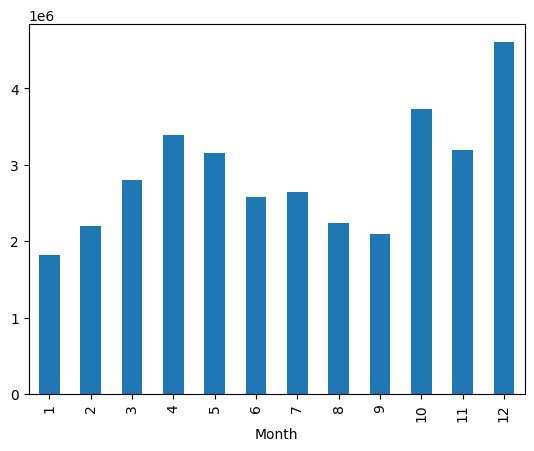

In [ ]:
sales.groupby('Month')['Sales'].sum().plot(kind='bar')

Finding which city has max order

In [ ]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
sales['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [ ]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [ ]:
def return_state(y):
    return y.split(',')[1]

In [ ]:
sales['City'] = sales['Purchase Address'].apply(return_state)

In [ ]:
sales['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

This is a Pie Chart for city with max orders 
*NOTE - for getting percentage use autopct='%1.0f%%

C:\Users\yadav\AppData\Local\Temp\ipykernel_9060\164423112.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(sales['City']).plot(kind='pie',autopct='%1.0f%%')


<Axes: ylabel='count'>

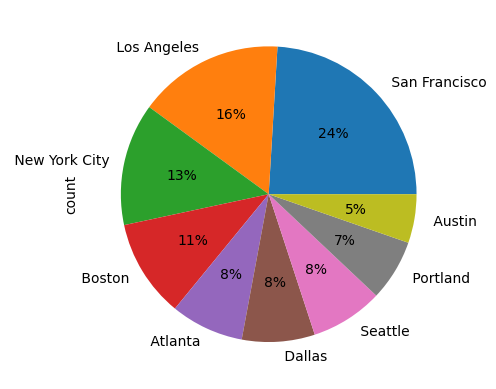

In [ ]:
pd.value_counts(sales['City']).plot(kind='pie',autopct='%1.0f%%')

In [ ]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles


Finding which prodcut sold the most and why?

In [ ]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'State', 'City'],
      dtype='object')

In [ ]:
max_sold_df = sales.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})

In [ ]:
max_sold_df.head()

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84


In [ ]:
most_sold_df= most_sold_df.reset_index()

In [ ]:
Product = most_sold_df['Product'].values

C:\Users\yadav\AppData\Local\Temp\ipykernel_9060\2965531746.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Product, rotation = 'vertical', fontsize = 8)


Text(0, 0.5, 'Avg Price')

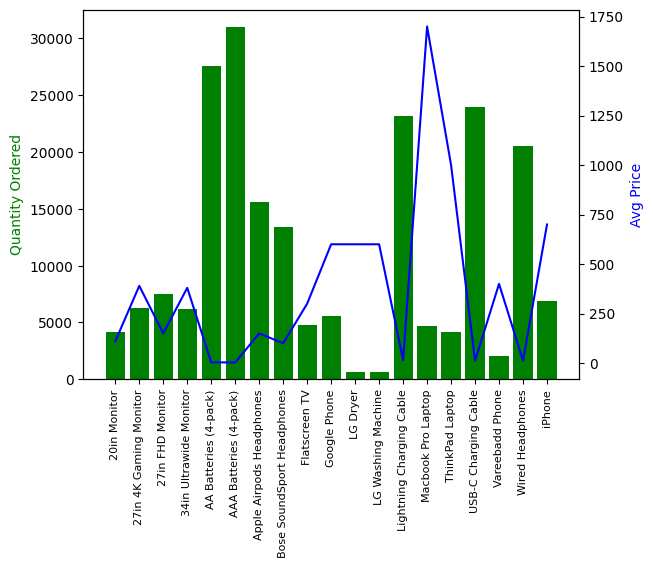

In [ ]:
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(most_sold_df['Product'],most_sold_df['Quantity Ordered'],color='g')
ax2.plot(most_sold_df['Product'],most_sold_df['Price Each'],color='b')

ax1.set_xticklabels(Product, rotation = 'vertical', fontsize = 8)

ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Avg Price', color='b')

From this we can say that (AAA batrries 4 pack) is the best selleing product when the price is low, the best selling product have a correaltion with the price

Understanding the trend of the most sold product

In [ ]:
sales['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [ ]:
most_sold_Product = sales['Product'].value_counts()[0:5].index

In [ ]:
#Consider this as a filter
sales['Product'].isin(most_sold_Product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

Now this will give us the dataframe only containing the most sold products

In [ ]:
most_sold_product_df= sales[sales['Product'].isin(most_sold_Product)]

In [ ]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,Atlanta


In [ ]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [ ]:
pivot_table = most_sold_product_df.groupby(['Month','Product']).size().unstack()

<Axes: xlabel='Month'>

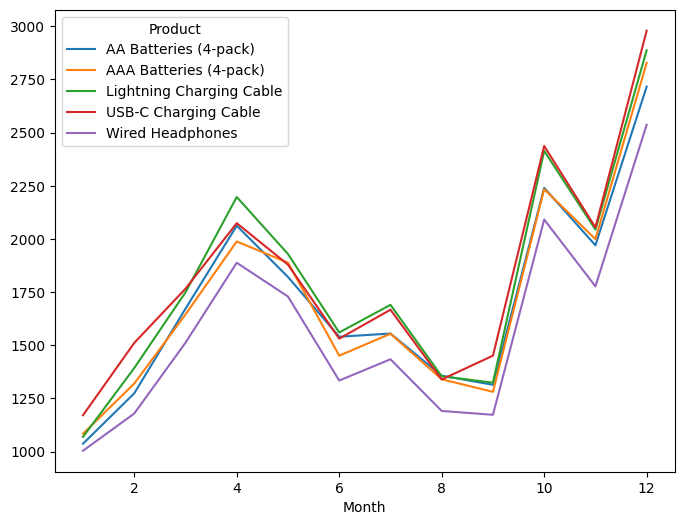

In [ ]:
pivot_table.plot(figsize = (8,6))

What Prodcuts are most often sold

In [ ]:
sales['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [ ]:
df_duplicated = sales[sales['Order ID'].duplicated(keep = False)]

In [ ]:
dup_product = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x :','.join(x)).reset_index().rename(columns = {'Product':'Grouped_Prodcut'})

In [ ]:
dup_products_df = df_duplicated.merge(dup_product, on = 'Order ID', how = 'left')

In [ ]:
no_dup_df = dup_products_df.drop_duplicates(subset = ['Order ID'])

In [ ]:
no_dup_df.shape

(6879, 11)

<Axes: ylabel='count'>

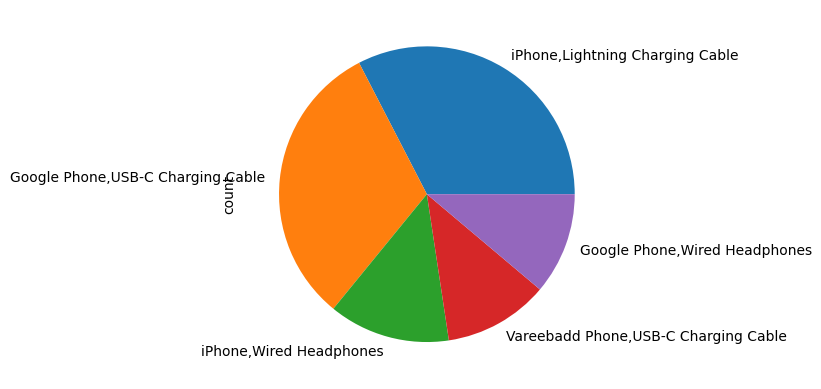

In [ ]:
no_dup_df['Grouped_Prodcut'].value_counts()[0:5].plot(kind = 'pie')